# Data Scientist Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

** HINT: ** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k = data['income'].value_counts()['>50K']

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k = data['income'].value_counts()['<=50K']

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (100.*n_greater_50k) / n_records

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.03f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.784%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

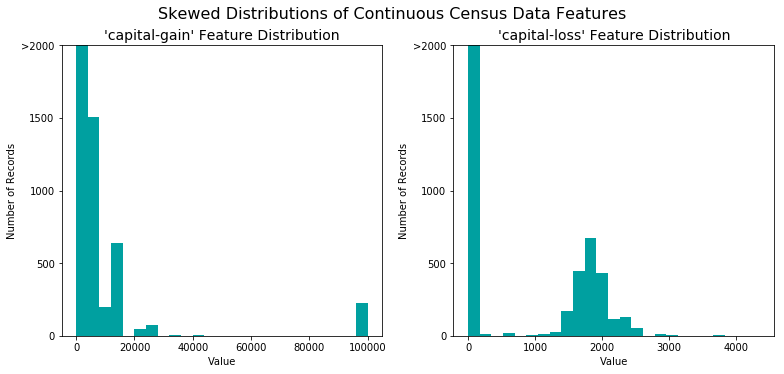

In [3]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

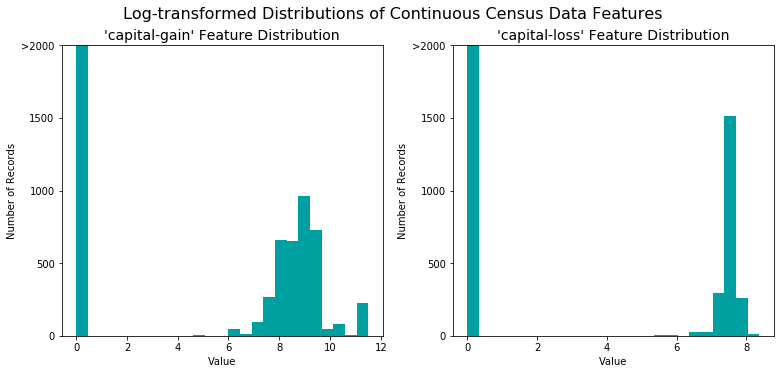

In [4]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [6]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
one_hot_encoding = ['workclass', 
                    'education_level', 
                    'marital-status', 
                    'occupation', 
                    'relationship',
                    'race', 
                    'sex', 
                    'native-country']
features_final = pd.DataFrame(data = features_log_minmax_transform)
features_final = pd.get_dummies(features_final, columns=one_hot_encoding)

# TODO: Encode the 'income_raw' data to numerical values
income = income_raw.replace({'<=50K': 0, '>50K': 1})  

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
# print(encoded)

103 total features after one-hot encoding.


### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    stratify=income,
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


/home/ayk/anaconda3/envs/env3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

** Please note ** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

** HINT: ** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [8]:
'''
TP = np.sum(income) # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data 
encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case
'''
# TODO: Calculate accuracy, precision and recall
TP = np.sum(income)
accuracy =  float(TP)/income.count()
recall = 1.
precision = float(TP)/income.count()

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
fscore = (1+beta**2) * (precision * recall) / (beta**2 * precision + recall)

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

** HINT: **

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **

#### SVM - Support Vector Machine. ####
<p><i>Application</i></p>

SVM models are being used in bioinformatics:<br>
- Support vector machine classification and validation of cancer tissue samples using microarray expression data: https://www.ncbi.nlm.nih.gov/pubmed/11120680

>  Microarray expression experiments allow the recording of expression levels of thousands of genes simultaneously.
These experiments can be focused on evaluating each gene in a single environment but in different types of tissues, especially cancerous tissues and have shown promise in classifying tissue types (diagnosis) and in the identiﬁcation of genes whose expressionsare good diagnostic indicators.

The primary objective of this application is the proper classiﬁcation of new samples. Authors do this by training the SVM on samples classiﬁed by experts, then testing the SVM on samples it has not seen before. Authors demonstrate how SVMs can not only classify new samples, but can also help in the identiﬁcationof those which have been wrongly classiﬁed by experts. 

(PDF) Support Vector Machine Classification and Validation of Cancer Tissue Samples Using Microarray Expression Data. Available from: https://www.researchgate.net/publication/2356696_Support_Vector_Machine_Classification_and_Validation_of_Cancer_Tissue_Samples_Using_Microarray_Expression_Data [accessed Jun 30 2018].

<p><i>Model strengths</i></p>

1. Performs well on datasets where the number of features is large compared to the number of examples.
2. Exhibits robust performance with respect to sparse and noisy data.
  * Separates a given set of binary labeled training data with a hyper-plane that is maximally distant from them.
3. Handles complex datasets that are not linear separable via application of a kernel function.
  * When data set is not linearly separable, we need to learn non-linear relations with a linear machine. This is equivalent to applying non-linear transform to the feature space. A kernel function, which computes inner product of two feature vectors, combines the transform and the inner product. This eliminates reqirement to compute and store feature transform for each sample vector of traininig/testing data set.
  * The number of parameters to estimate becomes independent of the dimension of the feature space! Feature space can be infinite.
4. Estimation is a convex optimization problem - there is no local minima.
5. Small number of hyperparameters.

<p><i>Model weaknesses</i></p>

1. Computational cost grows quadratically with number of samples: O(n_samples^2 * n_features).
  * Extensive memory requirements of the required quadratic programming in large-scale tasks.
2. Lack of transparency of the results.
3. Model selection should be used to select a kernel.

<p><i>What makes model a good candidate for the problem.</i></p>

The data set is high dimensional - 103 features- and is not linearly separable. We would need to transform fetaure space to introduce non-linear features in order to produce separating hyperplane by a linear model. SVM with kernels is a suitable model to apply to high-dimensional data set.
Given a size of the training dataset, cost of computing resources - RAM, CPU time - does not prohibit us from using SVM as a model.

#### Random Forest ####
<p><i>Application</i></p>

* Random Forest Algorithm for the Classification of Neuroimaging Data in Alzheimer's Disease: A Systematic Review. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5635046/

> Mild cognitive impairment (MCI) is an intermediate state between healthy aging and AD, which is not severe enough to interfere with daily life. Although not all MCI subjects develop to AD and they remain cognitively stable for many years, the incidence of progression is evaluated between 10 and 15% per year (Palmqvist et al., 2012). There is no generally accepted cure for AD, but several treatments exist for delaying its course. For this reason, it is extremely important to early detect the MCI subjects that are at imminent risk of conversion to AD.

According to the researchers, "...RF showed important advantages over other methodologies regarding the ability to handle highly non-linearly correlated data, robustness to noise, tuning simplicity, and opportunity for efficient parallel processing (Caruana and Niculescu-Mizil, 2006). Moreover, RF presents another important characteristic: an intrinsic feature selection step, applied prior to the classification task, to reduce the variables space by giving an importance value to each feature..."

 
<p><i>Model strengths</i></p>

1. Random Forest can be used for classification and regression tasks.
2. Classifier exhibits reduced variance and higher bias, which leads to a better model.
  * The Random Forest algorithm randomly selects observations and features to build several decision trees and then averages the results. It is similar to sampling of voters from population pool. The forest "grows" trees that are not correlated (or less correalated) with each other. Each tree in the forest "looks" at a training sample from its unique angle, defined by collection of features sampled at random from the collection of all features. The result is greater tree diversity.
3. Algorithm can be used to identify feature importance.
4. Algorithm does not require feature normalization; handles categorical features.
5. Algorithm can estimate probability than an instance belongs to a particular class.
6. Algorithm can model non-linear data.
7. Efficient for very large data sets.
8. Algorithm is robust to outliers.
9. Ability to deal with irrelevant features.

<p><i>Model weaknesses</i></p>

1. Classification accuracy of each tree in the forest should be relatively high in order for ensemble to perform well.
2. Difficult to interpret.

<p><i>What makes model a good candidate for the problem.</i></p>

1. Data set is high dimensional and not linear separable. The Random Forest is capable of modelling non-linear data and does not require transformation of feature space.
2. Speed of training.

#### Gradient Boosting ####
Gradient Boosting builds an ensemble of classifiers by sequentially adding predictors, where next predictor corrects its predecessor.

<p><i>Application</i></p>

While I have not found references for real-world applications using Gradient Boosting classifier, this algorithm can be used for the problems where SVM and Random Forest classifiers are being used.
   
<p><i>Model strengths</i></p>

1. Provides predictive accuracy comparable to the best that can be achieved with the training data set.
1. Algorithm does not require feature normalization; handles categorical features.
2. Algorithm can estimate probability than an instance belongs to a particular class.
3. Ability to estimate feature importance.
4. Algorithm can model non-linear data.
5. Algorithm is robust to outliers.
6. Ability to deal with irrelevant features.

<p><i>Model weaknesses</i></p>

1. Sacrifies interpetablity compared to decision trees.
2. Scalability: builds ensemble of classifiers sequentially.


<p><i>What makes model a good candidate for the problem.</i></p>

1. A gradient boosting model is an accurate and effective off-the-shelf procedure for data mining.

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [9]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import accuracy_score, fbeta_score

_BETA = 0.5

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    
    # TODO: Calculate the training time
    results['train_time'] = time() - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[: 300])
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = time() - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=_BETA)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=_BETA)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [10]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# TODO: Initialize the three models
clf_A = SVC(random_state=112233)
clf_B = RandomForestClassifier(random_state=112233)
clf_C = GradientBoostingClassifier(random_state=112233)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
N = len(y_train)
samples_100 = N
samples_10 = int(0.1 * N + 0.5)
samples_1 = int(0.01 * N + 0.5)

size = {0: samples_1,
        1: samples_10,
        2: samples_100}

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

props = ['train_time', 'pred_time', 'acc_train', 'acc_test', 'f_train', 'f_test']
format_output = ("samples={:05d} train_time={:0.3f} pred_time={:0.3f} acc_train={:0.3f} "
                 "acc_test={:0.3f} f_train={:0.3f} f_test={:0.3f}")
for name, values in results.items():
    print("{}".format(name))
    for num, metric in values.items():
        print(('\t'+format_output).format(size[num], *[metric[x] for x in props]))

/home/ayk/anaconda3/envs/env3.6/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 362 samples.
SVC trained on 3618 samples.
SVC trained on 36177 samples.
RandomForestClassifier trained on 362 samples.
RandomForestClassifier trained on 3618 samples.
RandomForestClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 362 samples.
GradientBoostingClassifier trained on 3618 samples.
GradientBoostingClassifier trained on 36177 samples.
SVC
	samples=00362 train_time=0.018 pred_time=0.412 acc_train=0.773 acc_test=0.752 f_train=0.000 f_test=0.000
	samples=03618 train_time=1.640 pred_time=3.478 acc_train=0.840 acc_test=0.834 f_train=0.654 f_test=0.679
	samples=36177 train_time=152.868 pred_time=28.599 acc_train=0.850 acc_test=0.841 f_train=0.679 f_test=0.694
RandomForestClassifier
	samples=00362 train_time=0.027 pred_time=0.023 acc_train=0.997 acc_test=0.814 f_train=0.988 f_test=0.624
	samples=03618 train_time=0.071 pred_time=0.034 acc_train=0.987 acc_test=0.831 f_train=0.979 f_test=0.663
	samples=36177 train_time=0.785 pred_time=0.049 acc_t

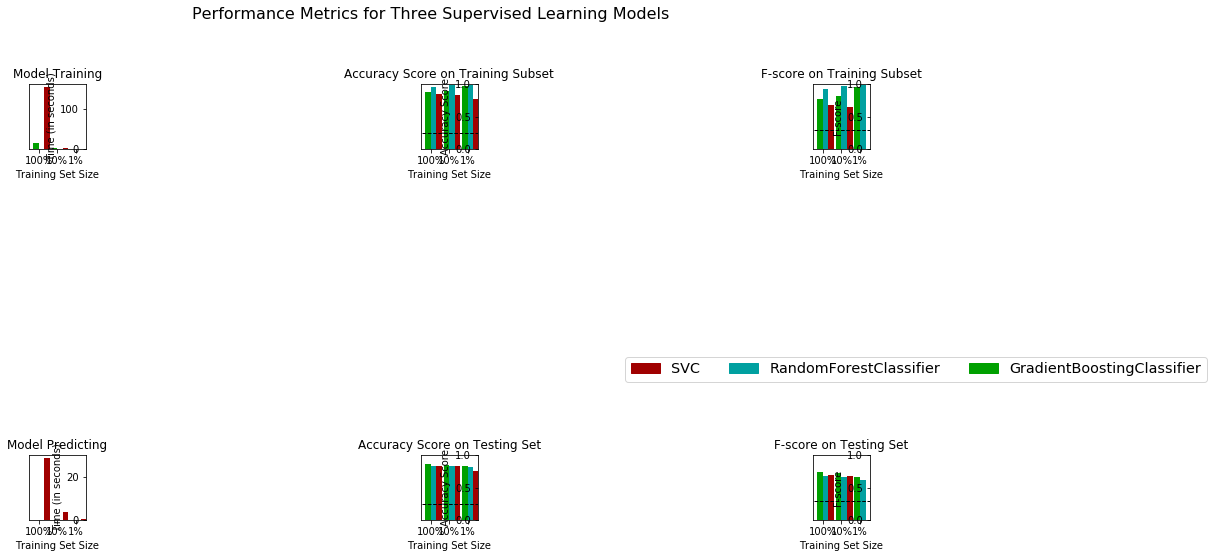

In [11]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

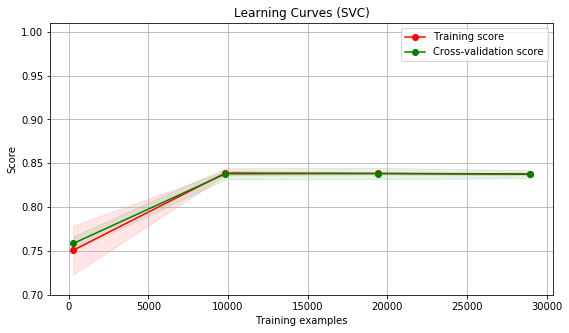

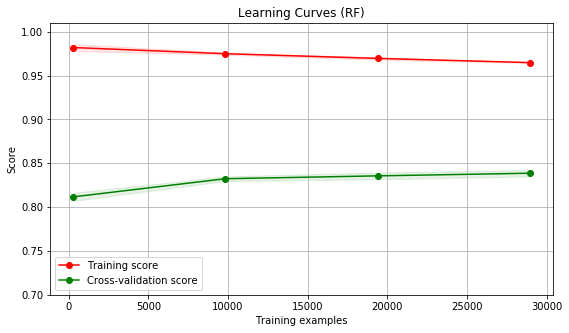

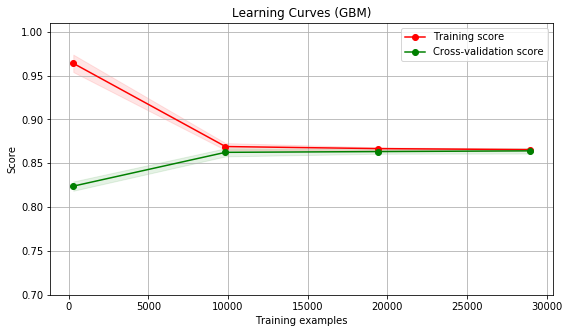

In [12]:
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

train_sizes = np.linspace(0.01, 1.0, 4) #[samples_1, samples_10, samples_100]
title = "Learning Curves (SVC)"
estimator = SVC(random_state=112233)
vs.plot_learning_curve(plt, estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, train_sizes=train_sizes)

title = "Learning Curves (RF)"
estimator = RandomForestClassifier(random_state=112233)
vs.plot_learning_curve(plt, estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, train_sizes=train_sizes)

title = "Learning Curves (GBM)"
estimator = GradientBoostingClassifier(random_state=112233)
vs.plot_learning_curve(plt, estimator, title, X_train, y_train, ylim=(0.7, 1.01), cv=cv, train_sizes=train_sizes)

plt.show()

----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

** HINT: ** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer: **

Gradient Boosted model is an accurate and effective off-the-shelf procedure for data mining and results of initial model evaluation step support this statement:
- In-sample and out-of-sample errors of Gradient Boosted model are better compared to similar metrics of SVM and Random Forest models.
- Learning curves, inferred from Accuracy vs. Sample size measurements, indicate that bias-variance tradeoff is similar for Gradient Boosted model and SVM model, with train and test errors converging for both models. Random Forest model's learning curves indicate high variance. We want our model to be robust to noise, and such model should have low variance.
 * Bias/Variance of Gradient Boosted model is approximately 0.13 and 0.04.
 * Bias/Variance of SVM model is approximately 0.15 and 0.03.
 * Bias/Variance of Random Forest model is approximately 0.09 and 0.1.
- Gradient Boosted model has better F-score value on test data among three models: 0.74 vs. 0.68 for Random Forest and 0.69 for SVM.
- Acceptable training time: 15 seconds one the complete training data set;
- Prediction time is comparable to prediction time of the Random Forest: 0.03s per sample.
- Gradient Boosted model is robust in the presence of irrelevant data and missing data.


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

** HINT: **

When explaining your model, if using external resources please include all citations.

**Answer: ** 

Gradient Boosting Classifier is chosen for the final model.

Trained Gradient Boosting model is an ensemble of weak learners. 

Gradient Boosting builds an ensemble of learners sequentially. Each next learner is trained to reconstruct difference between the target function and its estimate, where estimate is a sum of predictions of each learner. If a learner reconstructs this difference - residual - exactly, then an ensemble will give predictions without errors.

Any classifier - Logistic Regression, SVM, Decision Tree - can be used as a weak learner. A strong learner, such as SVM, should be regularized to exhibit high bias. We will use Decision Tree as a learner.


### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

#### Model tuning steps ####
In the following cells we will tune Gradient Boosted model to determine following model's parameters:
1. Number of learners / estimators.
2. Max depth of a tree.
3. Min samples split.
4. Min samples leaf.
5. Max features.
4. Subsample.
5. Learning rate and number of trees.

Tuning process is based on description published here:
https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, fbeta_score, precision_score, recall_score
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

def fit_model(clf, X, y, cv=3, scorer=make_scorer(fbeta_score, beta=0.5), report_features=True):
    scores = cross_val_score(clf, X, y, cv=cv, scoring=scorer)
    clf.fit(X, y)
    preds = clf.predict(X)
    probs = clf.predict_proba(X)[:, 1]
    
    print('CV scores: mean {:.03f}'.format(np.mean(scores)))
    print("Accuracy: {:.03f}".format(accuracy_score(y, preds)))
    print("F-score: {:.4f}".format(fbeta_score(y, preds, beta = 0.5)))
    print("Precision: {:.03f}".format(precision_score(y, preds)))
    print("Recall: {:.03f}".format(recall_score(y, preds)))
    print("AUC score {:.03f}".format(roc_auc_score(y, probs)))

    # Feature importance
    if report_features:
        feat_imp = pd.Series(clf.feature_importances_[:50], X.columns[:50]).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature importance')
        plt.ylabel('Feature importance score')
    

#### Model Baseline estimate #### 
- Estimate scores computed on training data set.
- We need to improve model's recall score: 0.618

CV scores: mean 0.746
Accuracy: 0.866
F-score: 0.7515
Precision: 0.795
Recall: 0.618
AUC score 0.923


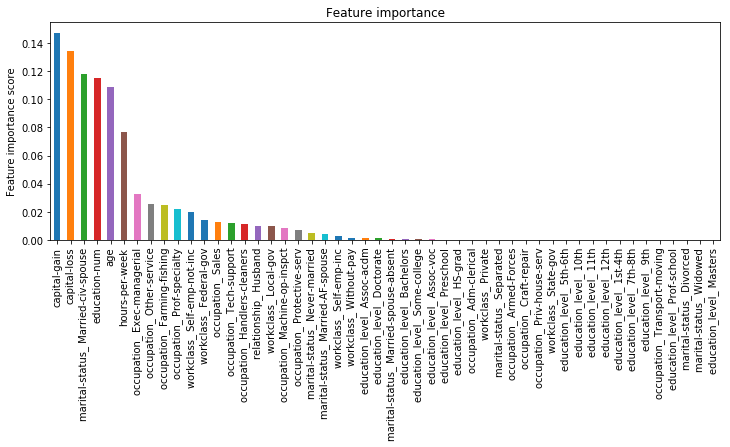

In [14]:
clf = GradientBoostingClassifier(random_state=112233)
fit_model(clf, X_train, y_train)

#### Select number of estimators for specified learning rate. ####
* Number of estimators for 0.1 learning rate is 120 - we will try learning rate of 0.2 to reduce number of estimators.

In [15]:
# Default learning rate=0.1
# Choose num estimators
from sklearn.grid_search import GridSearchCV

scorer=make_scorer(fbeta_score, beta=0.5)

params = {'n_estimators': [x for x in range(20, 121, 20)]}
gsearch1 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                            min_samples_split=300,
                                                            min_samples_leaf = 30,
                                                            max_depth=8,
                                                            subsample=0.8,
                                                            random_state=112233),
                         scoring=scorer,
                         cv=5,
                         param_grid=params)
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/home/ayk/anaconda3/envs/env3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: 0.74786, std: 0.00403, params: {'n_estimators': 20},
  mean: 0.75033, std: 0.00429, params: {'n_estimators': 40},
  mean: 0.75160, std: 0.00458, params: {'n_estimators': 60},
  mean: 0.74949, std: 0.00330, params: {'n_estimators': 80},
  mean: 0.74956, std: 0.00182, params: {'n_estimators': 100},
  mean: 0.74830, std: 0.00252, params: {'n_estimators': 120}],
 {'n_estimators': 60},
 0.7516046492802144)

In [16]:
# Tune tree specific params
params2 = {'max_depth': [x for x in range(5, 16, 2)],
          'min_samples_split': [x for x in range(200, 1001, 200)]}
gsearch2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                             n_estimators=60,
                                                             subsample=0.8,
                                                             random_state=112233),
                         scoring=scorer,
                         cv=5,
                         param_grid=params2)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75021, std: 0.00668, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.74986, std: 0.00680, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.75182, std: 0.00546, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.75057, std: 0.00558, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.75009, std: 0.00398, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.75195, std: 0.00644, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.75245, std: 0.00620, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.75235, std: 0.00575, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.74903, std: 0.00650, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.75130, std: 0.00797, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.74991, std: 0.00411, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.75007, std: 0.00429, params: {'max_depth': 9, 'min_samples_split': 400},
  

At the previous step we found best min_samples_split=1000. 
Next we will search for min_samples_leaf, and we will expolre values for min_samples_split greater than 1000, because 1000 was an upper bound of the search interval.

In [17]:
# Tune tree specific params
params3 = {'min_samples_leaf': [x for x in range(10, 81, 10)],
          'min_samples_split': [x for x in range(1000, 2100, 200)]}
gsearch3 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                             n_estimators=60,
                                                             max_depth=11,                                                           
                                                             subsample=0.8,
                                                             random_state=112233),
                         scoring=scorer,
                         cv=5,
                         param_grid=params3,
                         n_jobs=3)
gsearch3.fit(X_train, y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.75351, std: 0.00512, params: {'min_samples_leaf': 10, 'min_samples_split': 1000},
  mean: 0.75201, std: 0.00528, params: {'min_samples_leaf': 10, 'min_samples_split': 1200},
  mean: 0.75271, std: 0.00452, params: {'min_samples_leaf': 10, 'min_samples_split': 1400},
  mean: 0.75198, std: 0.00837, params: {'min_samples_leaf': 10, 'min_samples_split': 1600},
  mean: 0.75214, std: 0.00468, params: {'min_samples_leaf': 10, 'min_samples_split': 1800},
  mean: 0.75216, std: 0.00423, params: {'min_samples_leaf': 10, 'min_samples_split': 2000},
  mean: 0.75413, std: 0.00649, params: {'min_samples_leaf': 20, 'min_samples_split': 1000},
  mean: 0.74949, std: 0.00435, params: {'min_samples_leaf': 20, 'min_samples_split': 1200},
  mean: 0.75316, std: 0.00506, params: {'min_samples_leaf': 20, 'min_samples_split': 1400},
  mean: 0.75188, std: 0.00662, params: {'min_samples_leaf': 20, 'min_samples_split': 1600},
  mean: 0.75092, std: 0.00431, params: {'min_samples_leaf': 20, 'min_samples_spl

Performance metrics for the tuned model:
* Precision improved by 1.2%
* Recall improved by 7%.

CV scores: mean 0.749
Accuracy: 0.880
F-score: 0.7769
Precision: 0.807
Recall: 0.676
AUC score 0.940


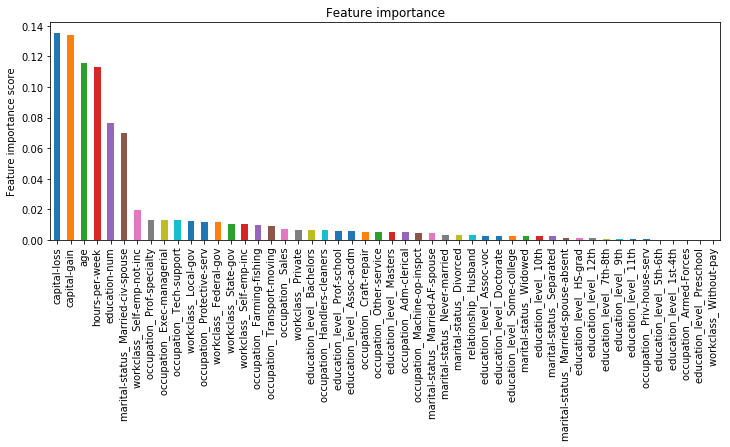

In [18]:
fit_model(gsearch3.best_estimator_, X_train, y_train)

In [19]:
gsearch3.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=11,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=20, min_samples_split=1000,
              min_weight_fraction_leaf=0.0, n_estimators=60,
              presort='auto', random_state=112233, subsample=0.8,
              verbose=0, warm_start=False)

In [20]:
# max features
params4 = {'max_features': [x for x in range(5, 104, 5)]}
gsearch4 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                             n_estimators=60,
                                                             max_depth=11,                                                           
                                                             subsample=0.8,
                                                             min_samples_leaf=20,
                                                             min_samples_split=1000,
                                                             random_state=112233),
                         scoring=scorer,
                         cv=5,
                         param_grid=params4,
                         n_jobs=3)
gsearch4.fit(X_train, y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.73627, std: 0.00346, params: {'max_features': 5},
  mean: 0.74358, std: 0.00315, params: {'max_features': 10},
  mean: 0.74920, std: 0.00448, params: {'max_features': 15},
  mean: 0.74945, std: 0.00378, params: {'max_features': 20},
  mean: 0.74876, std: 0.00381, params: {'max_features': 25},
  mean: 0.75054, std: 0.00451, params: {'max_features': 30},
  mean: 0.75078, std: 0.00451, params: {'max_features': 35},
  mean: 0.74999, std: 0.00552, params: {'max_features': 40},
  mean: 0.75158, std: 0.00502, params: {'max_features': 45},
  mean: 0.75026, std: 0.00468, params: {'max_features': 50},
  mean: 0.75095, std: 0.00526, params: {'max_features': 55},
  mean: 0.75163, std: 0.00530, params: {'max_features': 60},
  mean: 0.75063, std: 0.00417, params: {'max_features': 65},
  mean: 0.75153, std: 0.00357, params: {'max_features': 70},
  mean: 0.75054, std: 0.00338, params: {'max_features': 75},
  mean: 0.75350, std: 0.00425, params: {'max_features': 80},
  mean: 0.75358, std: 0.0

Search for optimal value of `subsample` parameter.

In [21]:
# Tune sabsample
params5 = {'subsample': [0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9]}
gsearch5 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                             n_estimators=60,
                                                             max_depth=11,                                                                                                                       
                                                             min_samples_leaf=20,
                                                             min_samples_split=1000,
                                                             max_features=85,
                                                             random_state=112233),
                         scoring=scorer,
                         cv=5,
                         param_grid=params5,
                         n_jobs=3)
gsearch5.fit(X_train, y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.74435, std: 0.00295, params: {'subsample': 0.4},
  mean: 0.74930, std: 0.00489, params: {'subsample': 0.5},
  mean: 0.75198, std: 0.00430, params: {'subsample': 0.6},
  mean: 0.75249, std: 0.00427, params: {'subsample': 0.7},
  mean: 0.75358, std: 0.00652, params: {'subsample': 0.8},
  mean: 0.75347, std: 0.00450, params: {'subsample': 0.85},
  mean: 0.75317, std: 0.00469, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.7535839450682608)

Three runs below use lower learning rate to see whether it positvely affects model's performance.
Learning rate relates to number of estimators. We will use same ratio to decrease learning rate and increase number of learner.
We will try out following combinations:
* Learning rate 0.1 and 120 estimators. 
* Learning rate 0.02 and 600 estimators.
* Learning rate 0.01 and 1200 estimators.

We will monitor cross validated F-beta score (CV scores) to make sure model does not overift.

CV scores: mean 0.750
Accuracy: 0.878
F-score: 0.7732
Precision: 0.802
Recall: 0.675
AUC score 0.940


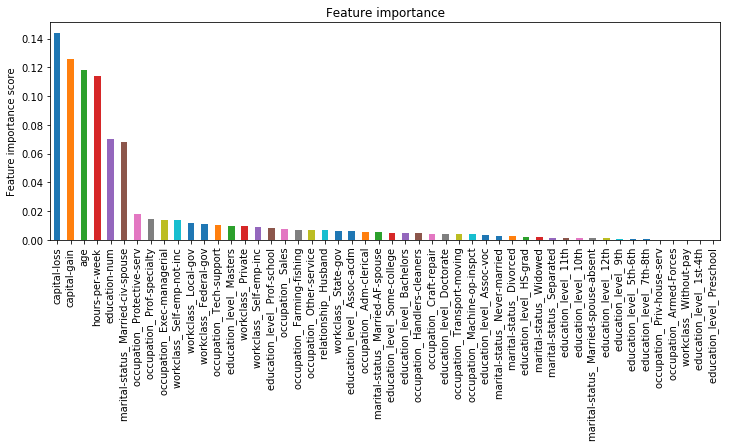

In [22]:
# Lower learning rate and increase number of trees using same ratio:

clf_120 = GradientBoostingClassifier(learning_rate=0.1,
                                     n_estimators=120,
                                     max_depth=11,                                                                                                                       
                                     min_samples_leaf=20,
                                     min_samples_split=1000,
                                     max_features=85,
                                     subsample=0.8,
                                    random_state=112233)
fit_model(clf_120, X_train, y_train)

CV scores: mean 0.750
Accuracy: 0.880
F-score: 0.7773
Precision: 0.806
Recall: 0.681
AUC score 0.940


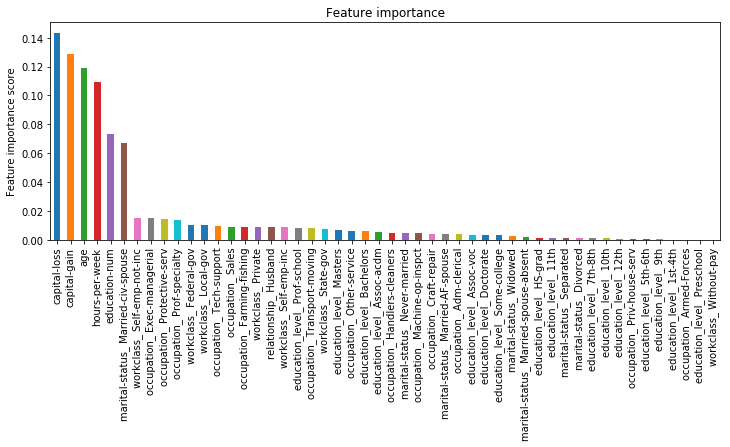

In [23]:
# Lower learning rate and increase number of trees using same ratio:

clf_600 = GradientBoostingClassifier(learning_rate=0.02,
                                     n_estimators=600,
                                     max_depth=11,                                                                                                                       
                                     min_samples_leaf=20,
                                     min_samples_split=1000,
                                     max_features=85,
                                     subsample=0.8,
                                    random_state=112233)
fit_model(clf_600, X_train, y_train)

CV scores: mean 0.751
Accuracy: 0.880
F-score: 0.7781
Precision: 0.807
Recall: 0.680
AUC score 0.940


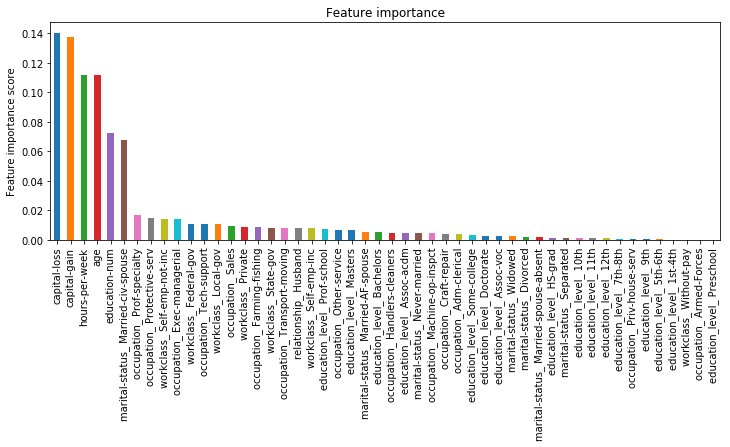

In [24]:
# Lower learning rate and increase number of trees using same ratio:

clf_1200 = GradientBoostingClassifier(learning_rate=0.01,
                                     n_estimators=1200,
                                     max_depth=11,                                                                                                                       
                                     min_samples_leaf=20,
                                     min_samples_split=1000,
                                     max_features=85,
                                     subsample=0.8,
                                    random_state=112233)
fit_model(clf_1200, X_train, y_train)

In [25]:
# Evaluate model on test data.
preds = clf_1200.predict(X_test)

print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, preds)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, preds, beta = 0.5)))
print("Precision: {:.03f}".format(precision_score(y_test, preds)))
print("Recall: {:.03f}".format(recall_score(y_test, preds)))


Final accuracy score on the testing data: 0.8714
Final F-score on the testing data: 0.7565
Precision: 0.783
Recall: 0.665


#### Model tuning summary ####

1. We will use `clf_1200` as our best model with following parameters:

 *  learning_rate=0.01,
 *  n_estimators=1200,
 *  max_depth=11,
 *  min_samples_leaf=20,
 *  min_samples_split=1000,
 *  max_features=85,
 *  subsample=0.8,
 *  random_state=112233
 

2. GradientBoostingClassifier model with these parameters, fit on complete training set, produced `0.81413` AUC score on Kaggle's Udacity ML Charity compeition for the test_census.csv test set.


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |       0.864       |   0.8714        |
| F-score        |       0.746       |   0.7565       |


**Answer: **

Optimized model's scores on test data are better than scores of unoptimized model.
While performance gain for F-score is only 1%, it is a result of improvement in recall score by 6%.

Comparison to naive predictor benchmarks:
1. F-score of tuned model is better due to improved precision score of the tuned model.
2. Accuracy of tuned model is better due to improved true positive and true negative scores of tuned model.


----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**

Belief about the relevancy of the predictors with respect to targets should be based on domain knowledge.
We can try to "acquire" domain knowledge by using the data set to compute mutual information between individual predictors and the target.

Based on mutual information scores, I have selected following top 5 most important features:

* capital-gain      
* age               
* education-num     
* occupation        
* hours-per-week    

Two highest scoring predictors - `relationship` and `marital-status` - were not selected, because it is hard to explain why these two are good predictors.

<p><i>Capital gain</i></p>
Capital gain is selected, because it seems logical that potential donors would have capital assets for which they report capital gains and losses. Only realized capital gains are reported, therefore recorded capital gain could serve as an indicator that individual might be willing to donate to offset capital gains tax.

<p><i>Age</i></p>
Age is a good candidate for a predictor, because donors are, most likely, individuals with high income and high income level is usually associated with age interval between 30 and 60 years.

<p><i>Education</i></p>
Features `education-num` and `education_level` should correlate, and only one continuous feature `education-num` was selected. 
Higher level of education usually translates to higher compensation.

<p><i>Occupation</i></p>
Occupation may serve as an indicator of salary bracket for an individual, together with education predictor.

<p><i>Hours per week</i></p>
Hours per week could be a good predictor. Forty hours per week indicate full time job and, together with education and occupation predictors, could identify individuals with high income.
Small number of hours per week may indicate that an individual is a student, or works part-time to supplement other income, and would not afford to donate in general.

Feature selection based on mutual information does not take into account interaction of features, and a feature by itself might not be a good predictor. Therefore, training a model on selected features, most likely, will produce a model with high bias.

In [26]:
from sklearn.feature_selection import mutual_info_classif

df = pd.DataFrame(data=features_log_minmax_transform)
for c in one_hot_encoding:
    df[c] = df[c].astype('category')
df[one_hot_encoding] = df[one_hot_encoding].apply(lambda x: x.cat.codes)
mi_scores = mutual_info_classif(df, 
                                income, 
                                [True if x in one_hot_encoding else False 
                                 for x in features_log_minmax_transform.columns],
                               random_state=112233)
print("Mutual Information scores:")
for name, score in sorted([(df.columns[i], v) for i,v in enumerate(mi_scores)], 
                         key=lambda x: x[1], 
                         reverse=True):
    print("{0:15} -> {1:.03f}".format(name, score))


Mutual Information scores:
relationship    -> 0.115
marital-status  -> 0.109
capital-gain    -> 0.080
age             -> 0.067
education-num   -> 0.065
education_level -> 0.064
occupation      -> 0.063
hours-per-week  -> 0.043
capital-loss    -> 0.036
sex             -> 0.026
workclass       -> 0.012
native-country  -> 0.006
race            -> 0.006


### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

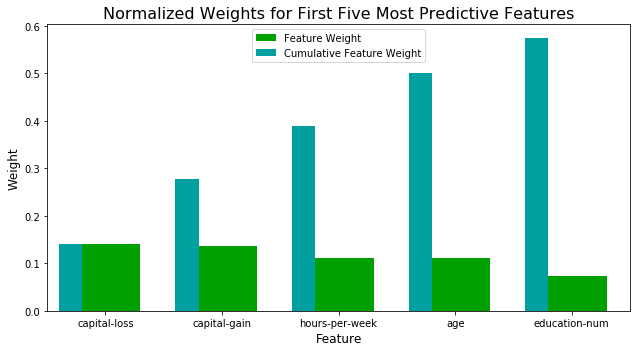

(36177, 103)


In [27]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = None

# TODO: Extract the feature importances using .feature_importances_ 
importances = clf_1200.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)
print(X_train.shape)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

Four out of five features selected in Question 6 are members of top five features reported by the tuned model, but their ranking is different.

Feature `capital-loss` did not get in the top five list and its mutual information score is lower than the score of the `capital-gain` by a factor of two, yet Gradient Boosted model assigned similar weights to these features.

There might be a logical reason to target individuals who report capital losses, because of tax strategies.

According to the article, published at https://www.irs.com/articles/tax-strategies-for-charitable-donations
> If you are holding on to depreciated property, you may want to use the strategy of selling it and giving the proceeds to a charitable organization, rather than donating the property itself. Since a capital loss is deductible, this strategy will allow you to deduct your initial loss and then deduct the property again as a charitable contribution.

Setting aside logical explanations for importance of the `capital-loss` predictor, let us consider why it is important that the Gradient Boosted model ranked `capital-loss` predictor second.

The model uses Decision Tree Classifier as a weak learner, and Decision Tree Classifier selects a feature to split on based on value of information gain - decrease in entropy .
According to scikit-learn documentation at http://scikit-learn.org/stable/modules/ensemble.html#gradient-boosting
> The relative rank (i.e. depth) of a feature used as a decision node in a tree can be used to assess the relative importance of that feature with respect to the predictability of the target variable. Features used at the top of the tree contribute to the final prediction decision of a larger fraction of the input samples. The expected fraction of the samples they contribute to can thus be used as an estimate of the relative importance of the features.

Therefore we may say that predictor `capital-loss`, being ranked second among all features, is important for the trained Gradient Boosted model, because 
* On average, among 1,200 Decision Tree Classifiers, this predictor is used at the top of a decision tree and affects large fraction of training samples.
* A fact that this predictor is used in decision nodes at the top of decision trees indicates that the model achieves large information gain compared to features other than `capital-gain` when splitting on this feature.


### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [28]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(clf_1200))
clf.max_features = 5

clf.fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, preds)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, preds, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))
print("P on testing data: {:.4f}".format(precision_score(y_test, reduced_predictions)))
print("R on testing data: {:.4f}".format(recall_score(y_test, reduced_predictions)))


Final Model trained on full data
------
Accuracy on testing data: 0.8714
F-score on testing data: 0.7565

Final Model trained on reduced data
------
Accuracy on testing data: 0.8376
F-score on testing data: 0.6918
P on testing data: 0.7705
R on testing data: 0.4911


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

Model fit on data with just five features exhibits high bias.

Model's recall score dropped 16% down to 50%. Yet precision score dropped by 1% only. This means that while model assigns more samples to the `false negative`category, it assigns less samples to the `false positive` category. Therefore we may infer that the model has lower variance due to noise reduction, and higher bias due to reduced hypotheses space.

In this particular case, I would not consider using the reduced data set as a training set, because reduced training set does not have enough features to produce hypotheses needed to achieve sufficient F-score.


### Resources ###

* "Learning From Data" Yaser S. Abu-Mostafa, Malik Magdon-Ismail, Hsuan-Tien Lin
* "The Elements Of Statistical Learning" Trevor Hastie, Robert Tibshirani, Jerome Friedman
* "Hands-On Machine Learning with Scikit-Learn & TensorFlow" Aurelien Geron

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.